In [1]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2024-01-17 23:20:59.844574: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-17 23:20:59.879113: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-17 23:20:59.879168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-17 23:20:59.880438: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-17 23:20:59.886610: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-17 23:20:59.887876: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



2


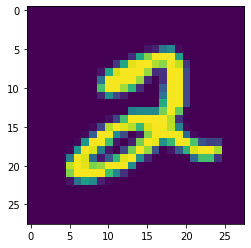

1


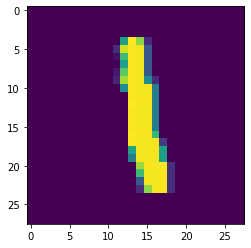

3


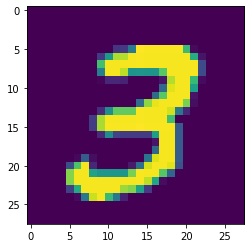

1


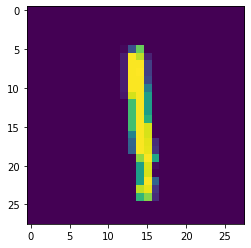

4


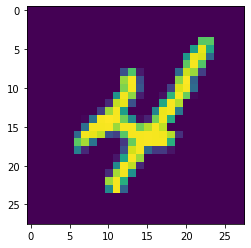

3


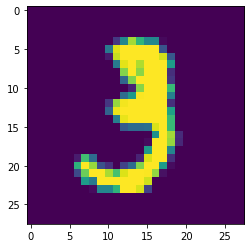

5


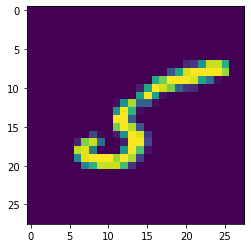

3


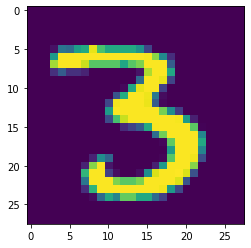

6


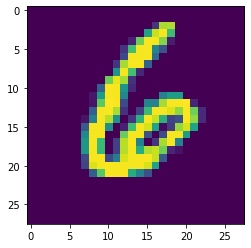

1


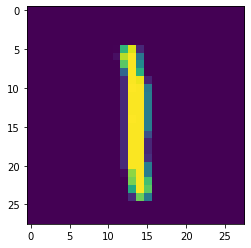

7


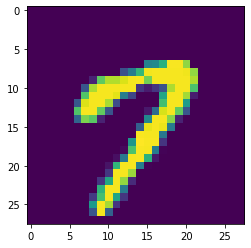

2


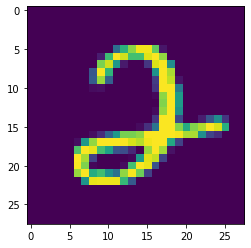

8


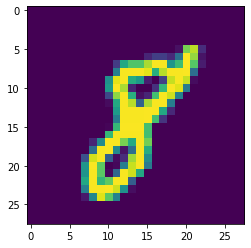

6


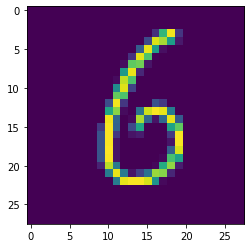

9


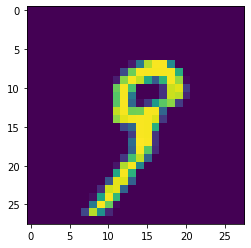

In [3]:
for x in range(5,20):
    img = x_train[x]
    y_tain = to_categorical(y_train)
    print(np.argmax(y_tain[x]))
    plt.imshow(img)
    plt.show()

In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train)


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [5]:
# Flatten the 28x28 images into 1D arrays
x_train = x_train.reshape((x_train.shape[0], 784)) # xtrain.reshape((60000,-1))
x_test = x_test.reshape((x_test.shape[0], 784))



In [6]:
# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# Build the MLP model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.1015 - val_accuracy: 0.9759
Epoch 2/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.1390 - val_accuracy: 0.9710
Epoch 3/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.1148 - val_accuracy: 0.9771
Epoch 4/10
4800/4800 [==============================] - 13s 3ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.1156 - val_accuracy: 0.9756
Epoch 5/10
4800/4800 [==============================] - 12s 2ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.1193 - val_accuracy: 0.9752
Epoch 6/10
4800/4800 [==============================] - 12s 2ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.1105 - val_accuracy: 0.9754
Epoch 7/10
4800/4800 [==============================] - 12s 2ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.1328 - val_ac

In [15]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

print(f'Model Summary:\n\n{model.summary()}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9770
Test Accuracy: 97.70%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 121514 (474.66 KB)
Trainable params: 121514 (474.66 KB)
Non-tra

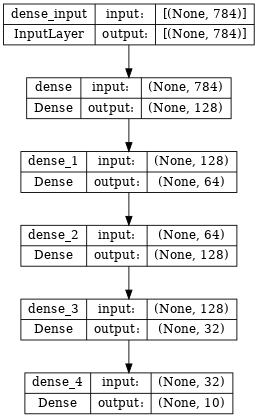

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)